In [175]:
#project -Supermarket store Sales Analysis

In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

In [20]:
df = pd.read_csv("Stores.csv")

In [21]:
print(df.shape)

(896, 5)


In [182]:
#Dataset Contains 896 Rows and 5 Columns

In [4]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [6]:
df.tail()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610
895,896,1174,1429,1110,54340


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [22]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [9]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


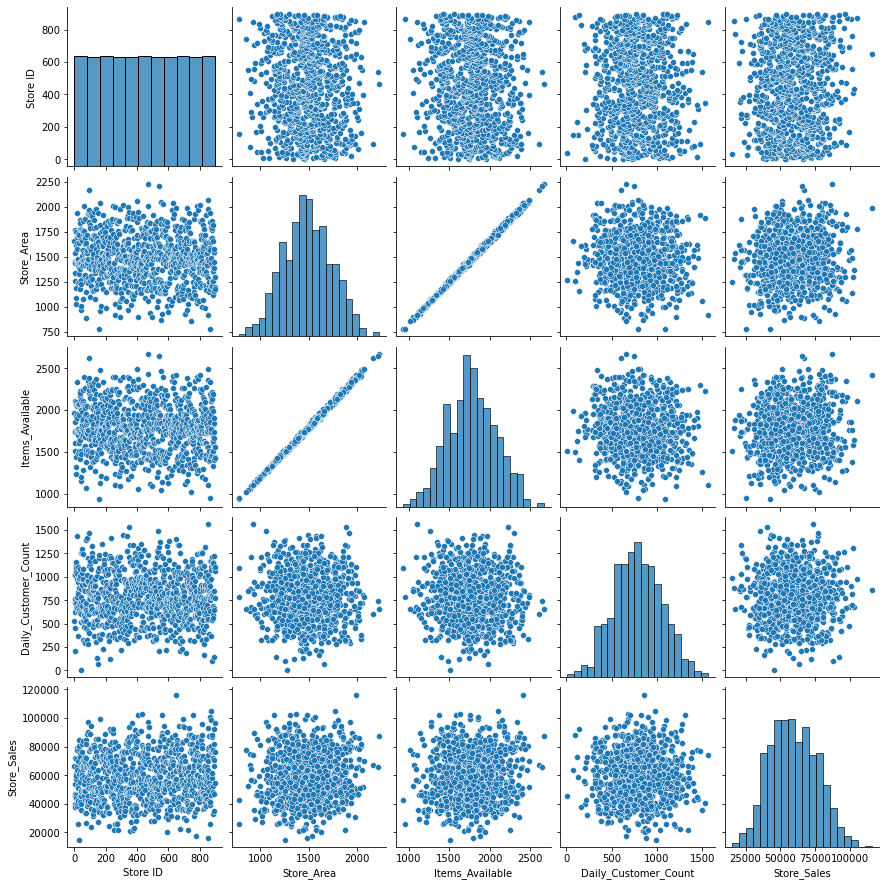

In [23]:
sb.pairplot(df,palette='Paired')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Items_Available', ylabel='Density'>

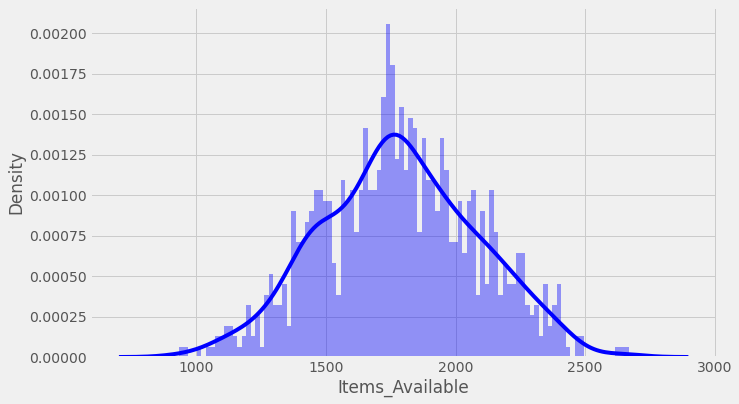

In [230]:
ax=plt.figure(figsize=(10,6))
sb.distplot(df["Items_Available"],color="blue",bins=100)

<AxesSubplot:xlabel='Store_Area', ylabel='Items_Available'>

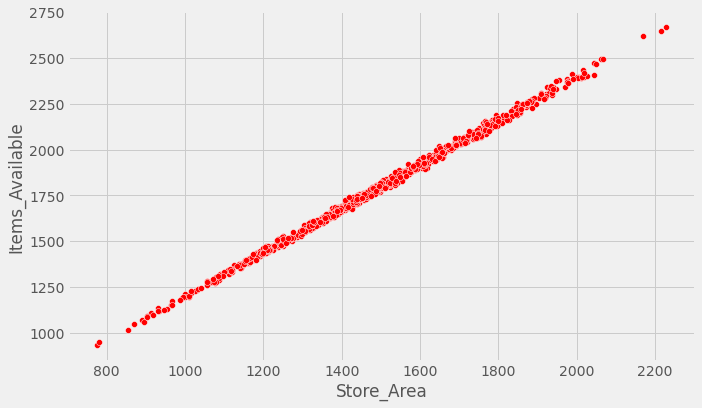

In [231]:
ax=plt.figure(figsize=(10,6))
sb.scatterplot(x='Store_Area',y='Items_Available',data=df,color="red")

<AxesSubplot:xlabel='Store_Sales', ylabel='Items_Available'>

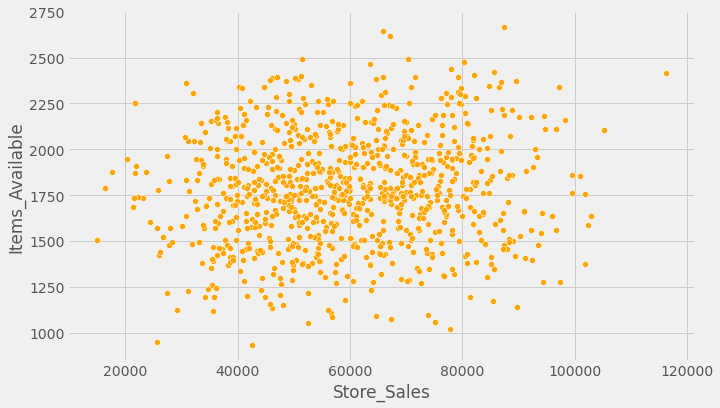

In [232]:
ax=plt.figure(figsize=(10,6))
sb.scatterplot(x='Store_Sales',y='Items_Available',data=df,color="orange")

<AxesSubplot:xlabel='Store_Sales', ylabel='Store_Area'>

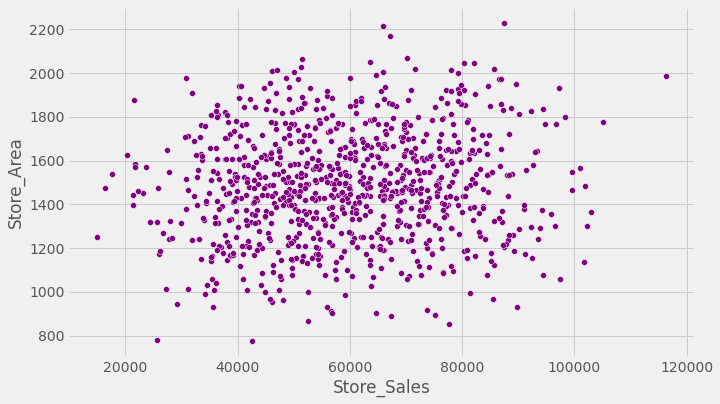

In [233]:
ax=plt.figure(figsize=(10,6))
sb.scatterplot(x='Store_Sales',y='Store_Area',data=df,color="purple")

<AxesSubplot:xlabel='Store_Sales', ylabel='Daily_Customer_Count'>

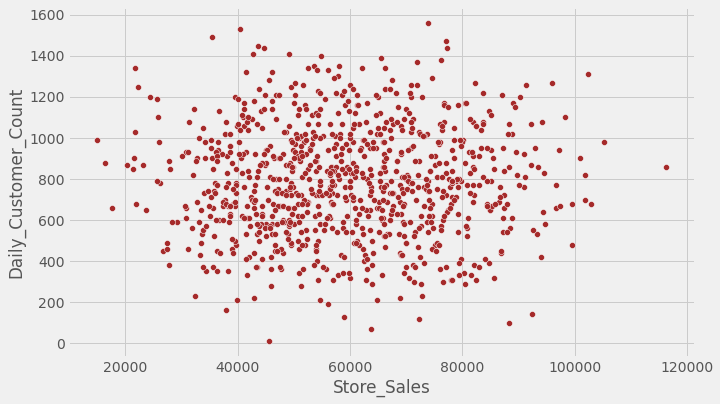

In [234]:
ax=plt.figure(figsize=(10,6))
sb.scatterplot(x='Store_Sales',y='Daily_Customer_Count',data=df,color="brown")

<AxesSubplot:>

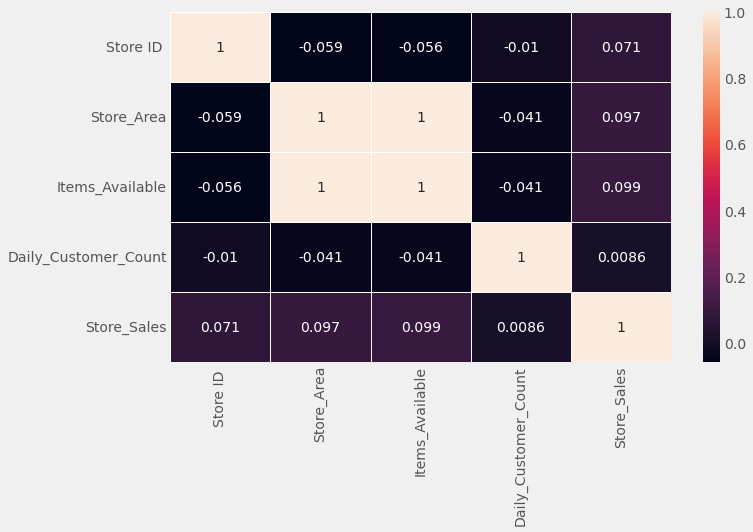

In [235]:
ax=plt.figure(figsize=(10,6))
corr=df.corr()
sb.heatmap(corr,linewidths=1,linecolor='white',annot=True)

In [ ]:
#lets seperate dependent and independent variables

In [24]:
X=df.drop('Store_Sales',axis=1)
y=df['Store_Sales']

In [25]:
X.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count
0,1,1659,1961,530
1,2,1461,1752,210
2,3,1340,1609,720
3,4,1451,1748,620
4,5,1770,2111,450


In [26]:
y.head()

0    66490
1    39820
2    54010
3    53730
4    46620
Name: Store_Sales, dtype: int64

In [145]:
#training and testing

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()

In [31]:
X_train=scaler.fit_transform(X_train)

In [32]:
#Linear Regression model:

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
linear_regression=LinearRegression()

In [39]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = linear_regression.predict(X_test)
print(y_pred)

[5676418.06508712 7158325.39325941 6766397.81774684 5979782.32053359
 7116914.90175185 5582795.85694222 5509616.76753996 8795144.38133425
 6595128.98586895 7708955.37169765 6343118.06102801 5303914.60605194
 8389028.44737757 6839646.1240408  6238495.84667086 6309367.36381096
 6048740.52022336 6501175.9172716  6128010.40225628 7380578.37837593
 7367060.0084574  8830149.145629   7707563.68603586 5764774.47701629
 7468060.79614997 6772257.86295814 7576239.48747161 8141633.09542174
 4956474.09228131 6759516.27173416 6004285.42750306 8292547.83260169
 6562241.56145096 6039805.99040548 4211122.90677942 8132899.92763904
 5374775.67093181 5640449.25974125 6411682.20121348 8039873.68425896
 7928782.98850265 6654673.58470026 7408952.62538804 6682305.79693131
 6974102.59620383 8386138.60203598 7098905.17118229 7288272.36403457
 5949187.87494853 6074080.65419033 5554305.893119   6763477.20885798
 7222015.72985219 8769337.55906219 6287618.34746261 7702401.38592145
 6486802.96483739 6478631.82232262

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [42]:
mean_absolute_error(y_test,y_pred)

6388087.699961063

In [43]:
np.sqrt(mean_squared_error(y_test,y_pred))

6460108.8380667195

In [44]:
df['Store_Sales'].describe()

count       896.000000
mean      59351.305804
std       17190.741895
min       14920.000000
25%       46530.000000
50%       58605.000000
75%       71872.500000
max      116320.000000
Name: Store_Sales, dtype: float64

In [168]:
#Polynomial Regression

In [57]:
X=df.drop('Store_Sales',axis=1)
y=df['Store_Sales']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [59]:
scaler=StandardScaler()

In [60]:
X_train=scaler.fit_transform(X_train)

In [61]:
X_test=scaler.transform(X_test)

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
poly_converter=PolynomialFeatures(degree=2,include_bias=False)

In [64]:
poly_features=poly_converter.fit_transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.20, random_state=101)

In [66]:
poly_model=LinearRegression()

In [67]:
poly_model.fit(X_train,y_train)

LinearRegression()

In [68]:
y_pred=poly_model.predict(X_test)

In [69]:
mean_absolute_error(y_test,y_pred)

14385.63683949411

In [70]:
np.sqrt(mean_squared_error(y_test,y_pred))

17279.637131121726